In [1]:
import pandas as pd
import zipfile
import matplotlib.pyplot as pl
import os

%matplotlib inline
os.getcwd()


'C:\\Users\\marcus.ohanlon'

In [2]:
z = zipfile.ZipFile('train.csv.zip')
print(z.namelist())

train = pd.read_csv(z.open('train.csv'), parse_dates=['Dates'])

train['Year'] = train['Dates'].map(lambda x: x.year)
train['Week'] = train['Dates'].map(lambda x: x.week)
train['Hour'] = train['Dates'].map(lambda x: x.hour)

print(train.head())

['train.csv']
                Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  Year  Week  Hour  
0 -122.425892  37.774599  2015    20    23  
1 -122.425892  37.774599  2015    20    23  
2 -

In [3]:
train.dtypes

Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
Year                   int64
Week                   int64
Hour                   int64
dtype: object

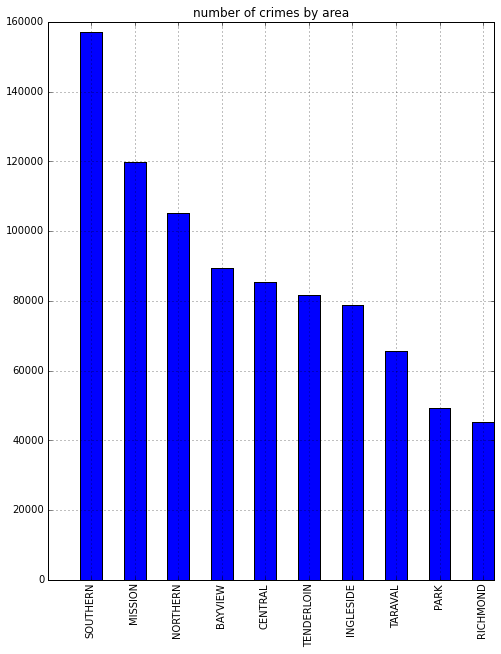

In [4]:
train.PdDistrict.value_counts().plot(kind='bar', figsize=(8,10),title='number of crimes by area')

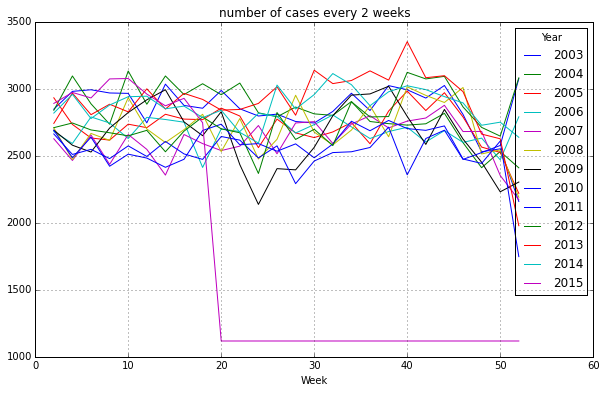

In [5]:
train['event']=1  #add counter column
weekly_events = train[['Week','Year','event']].groupby(['Year','Week']).count().reset_index()
weekly_events_years = weekly_events.pivot(index='Week', columns='Year', values='event').fillna(method='ffill')
#%matplotlib inline
ax = weekly_events_years.interpolate().plot(title='number of cases every 2 weeks', figsize=(10,6))



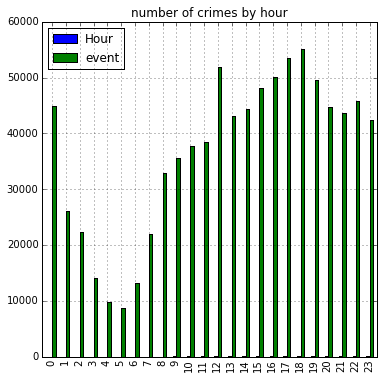

In [6]:
hourly_events = train[['Hour','event']].groupby(['Hour']).count().reset_index()
hourly_events.plot(kind='bar', figsize=(6, 6),title='number of crimes by hour')

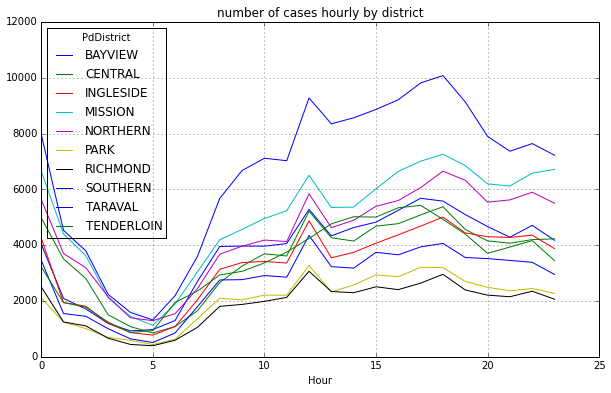

In [7]:
hourly_district_events = train[['PdDistrict','Hour','event']].groupby(['PdDistrict','Hour']).count().reset_index()
hourly_district_events_pivot = hourly_district_events.pivot(index='Hour', columns='PdDistrict', values='event').fillna(method='ffill')
hourly_district_events_pivot.interpolate().plot(title='number of cases hourly by district', figsize=(10,6))

In [8]:

len(pd.unique(train.Descript.ravel()))
#879 Unique Crimes

879

In [9]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from time import time
import seaborn as sns
import pandas as pd
import scipy
import zipfile
from matplotlib.backends.backend_pdf import PdfPages

NameError: global name 'drive' is not defined